In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Taylor series

Hopefully most of you will have seen Taylor series before.

A Taylor series is a method by which we can approximate an arbitrary function by a sum of terms made up of that function and its derivatives at a single point.

This concept underlies many things (especially in computational science) so it's worth us spending some time reviewing it.


## Motivation - a constant approximation

Consider a function of a single independent variable:  $f(x)$

Suppose this function is really really expensive to evaluate. Suppose I have already evaluated it at a single $x$ value, call it $x_0$, i.e. I know the value of $f(x_0)$.

Given only this information, what is the best guess (estimation/approximation) I can make for $f(x)$ for a choice $x\ne x_0$?

Well I can't really do anything better than 

$$  f(x) \approx f(x_0)$$

This may seem a hopeless approximation, but it can be used in some situations. Pretend $f$ is a weather forecast and $x$ is time. This just says that for a forecast of the weather tomorrow use what we see today - this is a real technique called [*persistent forecast*](https://en.wikipedia.org/wiki/Weather_forecasting#Persistence) ("today equals tomorrow").

"... This makes persistence a 'hard to beat' method for forecasting longer time periods": <http://ww2010.atmos.uiuc.edu/(Gh)/guides/mtr/fcst/mth/prst.rxml>

Let's consider an example:

In [5]:
def f(x):
    return np.exp(x)

and plot our current situation, assuming that $x_0=0$. We call this the expansion point - we are constructing an approximation "around this point".

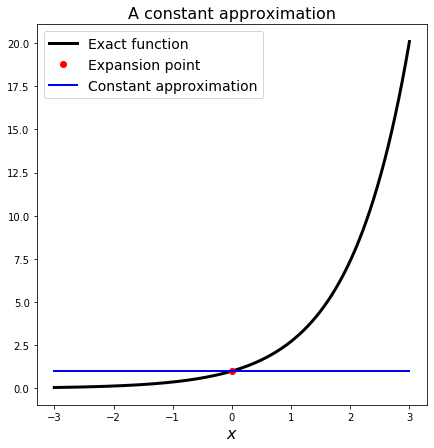

In [6]:
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)

ax1.set_title('A constant approximation', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)

# define our x for plotting purposes
x = np.linspace(-3., 3., 1000)

# plot exact function
ax1.plot(x, f(x), 'k', lw=3, label='Exact function')

# define our approximation
x0 = 0.0
y = f(x0)*np.ones_like(x)
ax1.plot(x0, f(x0), 'ro', label='Expansion point')

# and plot the constant approximation
ax1.plot(x, y, 'b', lw=2, label='Constant approximation')

ax1.legend(loc='best', fontsize=14)

Can I have any confidence in this guess?


1. Yes if it turns out that the function $f$ is actually a constant.


2. Yes, if I can assume that $f$ doesn't vary very much in the vicinity of $x_0$, and if we are interested in $x$ values that are close to $x_0$.


How can I do better?

## Motivation - a linear approximation (a "linearisation")

The obvious improvement we can make is to approximate the true function with a linear approximation rather than a constant. 

This is a common way to write a linear function:

$$ y = mx + c$$

where $m$ is the slope and $c$ is the intercept - the $y$ value the line hits the $x=0$ axis at.

We consider an approximation, or an expansion, (or in this case a "linearisation") "about a point".  

For us the point is $x_0$ and it makes sense for us to make the slope of the linear approximation the same as the derivative of the function at this point.  

So we are now using the value of $f$ at $x_0$ AND the value of the derivative of $f$ at $x_0$:  $m = f'(x_0)$.

This is the formula for the linear line with this slope:

$$ y = f'(x_0) x + c$$

where choice of $c$ moves the linear line up and down. We want it to pass through the function at $x_0$ as well of course, and this allows us to figure out what value $c$ should take.

Actually we generally write the linearisation in the following form

$$ f(x) \approx f(x_0) + (x-x_0)f'(x_0)$$

so when $(x-x_0)$ is zero, we are at the expansion point and we indeed get $f(x_0)$ on the RHS. As we move away from that point $(x-x_0)$ grows and our approximation adds a correction based on the size of the derivative at $x_0$.

Let's plot this. First we need to define the derivative:

In [7]:
# of course for our example f this is trivial:
def fx(x):
    return np.exp(x)

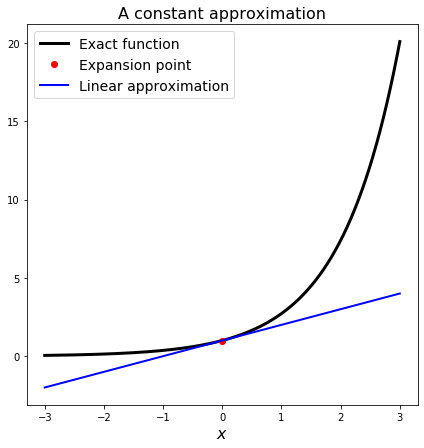

In [8]:
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)

ax1.set_title('A constant approximation', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)

# define our x for plotting purposes
x = np.linspace(-3., 3., 1000)

# plot exact function
ax1.plot(x, f(x), 'k', lw=3, label='Exact function')

# define our approximation
x0 = 0.0
y = (f(x0) + (x-x0)*fx(x0))*np.ones_like(x)
ax1.plot(x0, f(x0), 'ro', label='Expansion point')

# and plot the constant approximation
ax1.plot(x, y, 'b', lw=2, label='Linear approximation')

ax1.legend(loc='best', fontsize=14)


This is clearly an improved approximation compared to the constant one.

However the same accuracy points hold: if we are a long way from the expansion point, or if $f$ is very complex, this may not be a good approximation.

Can we do better - yes we can consider the curvature of the black line in addition to its value and its slope, i.e. we can include a term proportional to $f''(x_0)$ to our approximation.

and so on...

This is the formula for the infinite Taylor series *about (or around) the point $x_0$* 

$$f(x) = f(x_0) + (x - x_0) f'(x_0) + \frac{(x - x_0)^2}{2!} f''(x_0) + \frac{(x - x_0)^3}{3!} f'''(x_0) +
\frac{(x - x_0)^4}{4!} f^{(iv)}(x_0) + \ldots$$

An equivalent way of writing this expansion is

$$ f(x_0+h)  = f(x_0) + hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots $$

or replace $h$ by the notation $\Delta x$ or $\delta x$.

As we include more and more terms our approximation improves - see the following animated gif from Wikipedia which explains the point.

#### Taylor series example

*Wikipedia image: The exponential function (in blue), and the sum of the first (n + 1) terms of its Taylor series expansion around the point 0 (in red).*

<img src="https://upload.wikimedia.org/wikipedia/commons/6/62/Exp_series.gif" width=200x>


More terms equate with a better approximation valid a larger distance from $x_0$. 

### Aside: Big O notation

When talking about terms in infinite series (terms we will often be forces to truncate, i.e. throw away), or talking about errors, convergence, complexity, run times etc, so-called [Big-O](https://en.wikipedia.org/wiki/Big_O_notation) is very useful.

As an alternative to writing "$ \ldots $" in the above infinite expansions, we can also write 

$$f(x) = f(x_0) + (x - x_0) f'(x_0) + \frac{(x - x_0)^2}{2!} f''(x_0) + \frac{(x - x_0)^3}{3!} f'''(x_0) + \mathcal{O}((x - x_0)^4)$$

or

$$ f(x_0+h) = f(x_0) + hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \mathcal{O}(h^4) $$


What does this mean?

#### In Mathematics

Well simply $\mathcal{O}$ here means "order".

More formally it is used to signify (place bounds on) the limiting behaviour of the magnitude of a mathematical term (or an algorithm's runtime).

So based on the the example above we have simply replaced the terms 

$$ \frac{h^4}{4!} f^{(iv)}(x_0) +  \frac{h^5}{5!} f^{(v)}(x_0) + \ldots $$

with 

$$ \mathcal{O}(h^4) $$

"in the limit" (and implicitly for this use application we are interested in the limit as $h\rightarrow 0$)

i.e. we have written that

$$ \frac{h^4}{4!} f^{(iv)}(x_0) +  \frac{h^5}{5!} f^{(v)}(x_0) + \ldots  =  \mathcal{O}(h^4) $$

this is stating that as $h$ tends to zero the LHS can bounded in magnitude by a term of the form

$$ C h^4 $$

where $C$ is a constant, i.e. there exists a constant $C$ such that for all sufficiently small $h$

$$\left| \frac{h^4}{4!} f^{(iv)}(x_0) +  \frac{h^5}{5!} f^{(v)}(x_0) + \ldots \right| \le C h^4 $$

In our case the point is that, assuming $f$ is a well-behaved function, i.e. it's derivatives are bounded, then there will be a small enough $h$ such that the terms dependent on the 5th and higher powers or $h$ are very small relative to the first term 

They can't be ignored, but we can select a $C$ which is a bit larger than original factor ${h^4}/{4!}$ so that the above holds.

The point here isn't to actually find $C$, this is just notation to help convey a point.

It's important when analysing errors in algorithms.

Note that for this case we were considering the limit of small $h$ and so the lowest power eventually becomes dominant, the opposite situation would occur if we were considering the limit of large $h$.

With errors we are generally thinking about the former case, with run-times (where $h$ might be replaced with some measure of the size of the problem) we are in the latter case.

#### Example

Consider

$$g(y) = 3y^2 - y^3 + 9y^4$$

in the limit as $y\rightarrow 0$.

We can show that

$$\left| 3y^2 - y^3 + 9y^4 \right| \le \left| 3y^2\right| + \left|y^3\right| + \left|9y^4 \right| \le 3y^2 + y^2 + 9y^2 \le 13 y^2$$

as we are considering the case as $y$ gets small. Hence we can write 

$$g(y) = 3y^2 - y^3 + 9y^4 = \mathcal{O}(y^2) \quad\text{as}\quad y\rightarrow 0$$


If we were considering the case of $y\rightarrow \infty$, then we would write instead

$$g(y) = \mathcal{O}(y^4) \quad\text{as}\quad y\rightarrow \infty$$


When dealing with numerical errors you may see things like

$$\text{error} \approx 10^{-5}\Delta t +  10^{5}\Delta t^2$$

For larger values of $\Delta t$ the second term will clearly dominate due to the relative size of the constant in front of it compared to the first term.

But when performing a convergence analysis, i.e. investigating how the error drops as $\Delta t$ is reduced, there will come a point for small enough $\Delta t$ that the first term starts to dominate, and from the point onwards the error will decay linearly rather than quadratically, i.e. halving $\Delta t$ leads to a reduction in the error by a factor of 2 rather than 4.

So we would say that 

$$\text{error} = \mathcal{O}(\Delta t)$$

even though at larger $\Delta t$ values the error would be observed to decay quadratically as we reduce $\Delta t$.

We use the expression "in the asymptotic limit" to refer to region of parameter space where the leading order behaviour dominates. For the above example if we observe something that looks like second order behaviour (when we expect first) we would explain this away by saying that we are not in the asymptotic limit. If we see very close to first order behaviour then we would say we are in the asymptotic limit.

#### In Computer/Computational Science

For the cost of algorithms we use the notation in a similar manner.

An algorithm is said to have (*time* or *algorithmic* or *computational*) [complexity](https://en.wikipedia.org/wiki/Time_complexity) of $\mathcal{O}(n^2)$ for example,
if for large enough $n$, where $n$ is a measure of the problem size, the computational cost grows quadratically - for every doubling of the problem size the cost grows by a factor 4.

When it comes to complexity it's quite common to see things like $\mathcal{O}(n \log n)$, i.e. the algorithm scales worse than linearly, but not as bad as quadratically.

For some examples see <https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations>

## Truncation error

In principle we can use Taylor series to approximate a (sufficiently smooth) function with arbitrary accuracy as long as we use sufficiently many terms, but in practice we will have to truncate.

In the next section we will use similar ideas to compute an approximate solution to a differential equations, we will do this by approximating the operation of taking a derivative. 

Again by making use of enough terms from a Taylor series we can construct approximations of derivatives with arbitrary accuracy, but again in practice we will have to truncate.

In both cases the act of limiting the number of terms we use introduces an error.

Since we are truncating an infinite series at some point, this type of error is often called a [*truncation error*](https://en.wikipedia.org/wiki/Truncation_error). 

# Using Taylor series to solve an ODE numerically

## Deriving the forward Euler scheme

Let's suppose we have an ODE of the form

$$y' = f(t,y) \qquad\left[\text{NB. on the LHS we could also use the notation $\dot{y}$ or $\frac{dy}{dt}$}\right]
$$

This is describing a solution function of the form $y\equiv y(t)$, i.e. the solution $y$ is a function of one variable - $t$.  

$y$ is called the *dependent variable* and $t$ the *dependent variable*.

[NB. in the case where $y$ is multi-dimensional - a vector of unknowns/dependent variables - we would talk about a *system of ODEs*. For the case where there are more than one independent variables then we need to start thinking about *partial differential equations (PDEs)*, covered later in this module and in ACSE-3].

For example

$$y' = \exp(t), \qquad\text{or equivalently} \qquad y' = y$$

the first is an example where the RHS is a function of $t$ only, the second a function of $y$ only. 

This is an example where both $t$ and $y$ appear on the RHS:

$$y' = y + t^3$$

The first two ($y'=y$ or $y'=\exp(t)$) are relatively easy for us to solve analytically, the final case is a bit more challenging and we may need to resort to a numerical approach (or attempt symbolic computation).

We can formulate a simple numerical solver using a truncated Taylor series.

From above we know that (assuming smoothness of the solution) the following is true:

$$ y(t+\Delta t) = y(t) + \Delta t \, y'(t) + \frac{\Delta t^2}{2!}y''(t) + \frac{\Delta t^3}{3!}y'''(t) + \mathcal{O}(\Delta t^4),$$
 

Using the notation $y_n=y(t_n), \; y'_n=y'(t_n)$ etc, and assuming a uniform time step size $\Delta t$, this is equivalent to 

$$ y_{n+1} = y_n + \Delta t\, y'_n + \frac{\Delta t^2}{2!}y''_n + \frac{\Delta t^3}{3!}y'''_n + \mathcal{O}(\Delta t^4).$$

Dropping second-order terms (which we can justify if $y$ is "smooth", which means that $y''$ is "well-behaved", and $\Delta t$ is chosen to be sufficiently small so that the terms containing higher powers of $\Delta t$ are relatively speaking *very small*), 

and noting that $y'_n = f(t_n,y_n)$ we are left with the discrete relation

$$y_{n+1} = y_n + \Delta t \, f(t_n,y_n).$$

<br>

This is a very famous ODE solver, or time-stepping method - termed the **forward Euler** or **explicit Euler** method.

We have turned the continuous problem into a discrete one - we have discretised. And note that this is in a form similar to our logistic map, so we know that we can write a simple piece of code that iterates over $n$ to evaluate/predict/approximate the dynamics.

Let's consider the simple model problem 

$$y' = y$$

with the initial condition

$$y(0)=1$$

and see what one step of the forward Euler method does, we will assume that we start at some $t$ from the exact solution at that time, i.e. the starting point indicated by the red dot in the following image is on the exact solution (black) line.

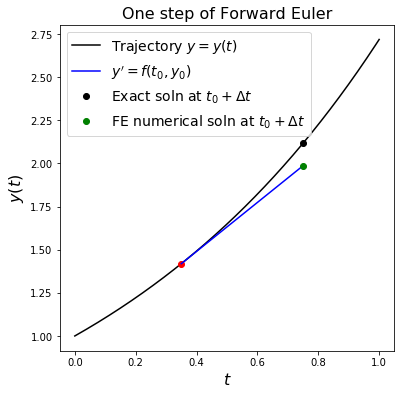

In [77]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_title('One step of Forward Euler', fontsize=16)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$y(t)$', fontsize=16)

t = np.linspace(0, 1, 1000)

# the RHS of the ODE
def f(t,y):
    return y

# an example solution trajectory (or solution to ODE $\dot{y}=f(y), y(0)=1$)
def y(t):
    return np.exp(t)

ax1.plot(t, y(t), 'k', label='Trajectory $y=y(t)$')

# this is just some location in time
t0 = 0.35
# and an example of a time step size large enough we can see what the method is doing
dt = 0.4

ax1.plot([t0], [y(t0)], 'ro')
ax1.plot([t0, t0 + dt], [y(t0), y(t0) + dt * f(t0, y(t0))], 'b', label = r"$y'=f(t_0,y_0)$")

ax1.plot([t0 + dt], [y(t0 + dt)], 'ko', label='Exact soln at $t_0 + \Delta t$')
ax1.plot([t0 + dt], [y(t0) + dt * f(t0, y(t0))], 'go', label='FE numerical soln at $t_0 + \Delta t$')
ax1.legend(loc='best', fontsize=14);

The black dot in the figure above shows what the true/exact solution at the new $n$ level is, while the green dot shows what the numerical solver predicts it to be.

The difference between the two is the error that has been introduced in a single step of the method.

Now in the next step of the algorithm we of course have to start from the green dot as we assume in practice we don't know the black line.  

The next step computes

$$y_{n+1} = y_n + \Delta t \, f(t_n,y_n),$$

but note that $f$ for this particular simple test case is simply $y$. 

We assume that we don't know what the exact solution is at this time level, and hence we can't read off the correct $t$ from the $x$ axis in the above plot and compute $\exp(t)$ in the RHS of our update. If we could then this would let us use the correct new slope at this time, i.e. the slope at the black dot.  

Instead we are forced to read off the $y$ axis - notice that in this example this gives us a $y$ value that is too small, and hence an $f$ that is too small. Therefore our next update will give us a second point that is even more too small!

The moral of the story here is that **errors generally accumulate**, as we can see if we plot this next step of the algorithm:

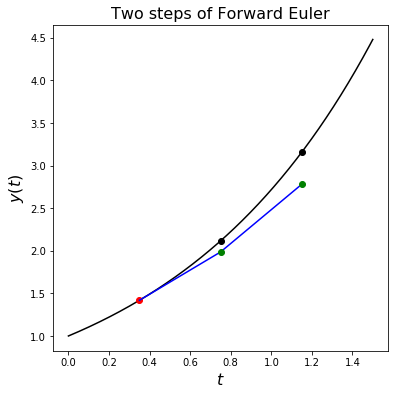

In [78]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_title('Two steps of Forward Euler', fontsize=16)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$y(t)$', fontsize=16)

t = np.linspace(0, 1.5, 1000)

# the RHS of the ODE
def f(t,y):
    return y

# an example solution trajectory (or solution to ODE $\dot{y}=f(y), y(0)=1$)
def y(t):
    return np.exp(t)


ax1.plot(t, y(t), 'k', label='Trajectory $y=y(t)$')

# this is just some location in time
t0 = 0.35
# and an example of a time step size large enough we can see what the method is doing
dt = 0.4


ax1.plot([t0], [y(t0)], 'ro')
ax1.plot([t0, t0 + dt], [y(t0), y(t0) + dt * f(t0, y(t0))], 'b')
y1 = y(t0) + dt * f(t0, y(t0))
ax1.plot([t0 + dt, t0 + 2*dt], [y1, y1 + dt * f(t0+dt, y1)], 'b')

ax1.plot([t0 + dt, t0+2*dt], [y(t0 + dt), y(t0+2*dt)], 'ko')
ax1.plot([t0 + dt, t0 + 2*dt], [y(t0) + dt * f(t0, y(t0)), y1 + dt * f(t0+dt, y1)], 'go')
